In [91]:
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline 

In [92]:
N = 60
n_avg = 3

In [190]:
G = nx.barabasi_albert_graph(N,n_avg)
set_influence(G, 0)
set_time(G, 0)

## Retrieve influential nodes - top q% and non-influential nodes
degree_ordered_nodes = sorted(list(G.nodes()), key=lambda x: G.degree(x), reverse=True)
influential_nodes_5   = degree_ordered_nodes[:int(0.05*N)]
influential_nodes_10  = degree_ordered_nodes[int(0.05*N):int(0.1*N)]
influential_nodes_15 = degree_ordered_nodes[int(0.1*N):int(0.15*N)]
influential_nodes_20 = degree_ordered_nodes[int(0.15*N):int(0.2*N)]
bottom_nodes = degree_ordered_nodes[int(0.9*N):]

In [191]:
## Normal nodes are nodes with degree close to average
lower, upper = int(np.floor(n_avg)), int(np.ceil(n_avg))
normal_nodes = [x for x in G.nodes() if lower <= G.degree(x) <= upper ]

influential_S_5, influential_S_10, influential_S_15, influential_S_20 = [], [], [], []
influential_t_5, influential_t_10, influential_t_15, influential_t_20 = [], [], [], []
normal_S, bottom_S = [], []
normal_t, bottom_t = [], []

In [244]:
influential_nodes_5[0]

3

In [96]:
set_time(G,0)

In [97]:
set_influence(G,0)

In [46]:
nx.get_node_attributes(G,'is_influenced')

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0}

In [47]:
normal_nodes[0]

20

In [98]:
def update_influence(G, node, phi, time, label='is_influenced'):
    '''
        Assumes the node isn't currently influenced.
        Update a node's influence status.
        Returns true or false.
    '''
    friends = list(G.neighbors(node))
    num_friends = len(friends)

    ## Node with no friends cannot be influenced
    if num_friends == 0:
        return False

    ## Calculate the number of friends who can influence 
    ## current node and compare with threshold.
    num_influenced = sum([1 for friend in friends if G.nodes[friend][label] == 1])
    if (num_influenced/num_friends) > phi:
        set_influence(G, 1, node=node)
        G.nodes[node]['time'] = time
        return True
    return False

In [194]:
set_influence(G,0)
set_time(G,0)
initial_node = influential_nodes_5[2]
phi = 0.18

set_influence(G, 1, node=initial_node)
G.nodes[initial_node]['time'] = 1
N = G.number_of_nodes()
t = [0 for _ in range(N)]
time, num_influenced = 2, 1
t[1] = 1
influenced_nodes = set([initial_node])

## Iteratively compute the number of nodes (update t[time]) influenced at
## each time step until a time step is reached where no neighbours to
## the influenced component can be influenced.
while num_influenced > 0:
    num_influenced = 0
    neighbours = get_uninfluenced_neighbours(G, influenced_nodes)
    for node in neighbours:
        if update_influence(G, node, phi, time):
            num_influenced += 1
            influenced_nodes.add(node)
    t[time] = num_influenced
    time += 1
t

[0,
 1,
 8,
 12,
 29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [186]:
nx.get_node_attributes(G, 'time')

{0: 4,
 1: 4,
 2: 4,
 3: 3,
 4: 3,
 5: 3,
 6: 1,
 7: 4,
 8: 3,
 9: 3,
 10: 3,
 11: 4,
 12: 3,
 13: 4,
 14: 3,
 15: 3,
 16: 3,
 17: 4,
 18: 2,
 19: 3,
 20: 2,
 21: 4,
 22: 2,
 23: 4,
 24: 2,
 25: 4,
 26: 2,
 27: 2,
 28: 3,
 29: 4,
 30: 3,
 31: 4,
 32: 4,
 33: 3,
 34: 2,
 35: 2,
 36: 3,
 37: 4,
 38: 4,
 39: 4,
 40: 2,
 41: 3,
 42: 3,
 43: 3,
 44: 3,
 45: 3,
 46: 2,
 47: 3,
 48: 3,
 49: 4,
 50: 2,
 51: 3,
 52: 4,
 53: 2,
 54: 4,
 55: 4,
 56: 4,
 57: 4,
 58: 4,
 59: 4}

In [194]:
nx.get_node_attributes(G,'is_influenced')

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1}

In [100]:
import plotly.graph_objects as go

In [115]:
initial_node

6

In [145]:
# G = nx.random_geometric_graph(200, 0.125)
pos = nx.kamada_kawai_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
pos = nx.spiral_layout(G, center=[1,2])

In [215]:
tmp = nx.get_node_attributes(G, 'time')
shells = []
z = []
for i in range(max(nx.get_node_attributes(G, 'time').values())+1):
    shl = []
    for node in tmp:
        if tmp[node] == i:
            shl.append(node)
    if i == 0:
        z = shl.copy()
    else:
        shells.append(shl)
if len(z) > 0:
    shells.append(z)

In [211]:
z

[15, 25, 30, 37, 38, 46, 51, 54, 56, 59]

In [216]:
pos = nx.shell_layout(G, nlist=shells)

In [217]:
shells

[[5],
 [14, 18, 20, 36, 44, 49, 50, 55],
 [2, 7, 9, 10, 11, 12, 16, 21, 27, 48, 53, 58],
 [0,
  1,
  3,
  4,
  6,
  8,
  13,
  17,
  19,
  22,
  23,
  24,
  26,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  39,
  40,
  41,
  42,
  43,
  45,
  47,
  52,
  57],
 [15, 25, 30, 37, 38, 46, 51, 54, 56, 59]]

In [218]:
for node in pos:
    G.nodes[node]['pos'] = pos[node]

In [295]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#FFFFFF'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    
tim = list(nx.get_node_attributes(G, 'time').values())
# col = ['#000000', '#FF0034', '#F802A2', '#9F02F8', '#6C43E5', '#B7F2CB']
# col = ['#000000', '#FDE725', '#73D055', '#1F968B', '#404178', '#39568C',]
# col = ["#000000","#67001F", "#F4A582", "#D1E5F0", "#92C5DE", "#053061"]
# times = [col[x] for x in tim] 
times = tim
# times = [str(x) for x in tim]
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
#         showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale=[[0, "rgb(51,160,44)"],
                [0.25, "rgb(178,223,138)"],
                [0.45, "rgb(179,226,205)"],
                [0.65, "rgb(230,245,201)"],
                [0.85, "#FFFFFF"],
                [1, "#000000"]],
        reversescale=True,
        color=times,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Time Influenced',
            titlefont=dict(color="#FFFFFF"),
            xanchor='left',
            titleside='bottom',
            dtick=1,
            tickfont=dict(color="#FFFFFF")
        ),
        line_width=2))



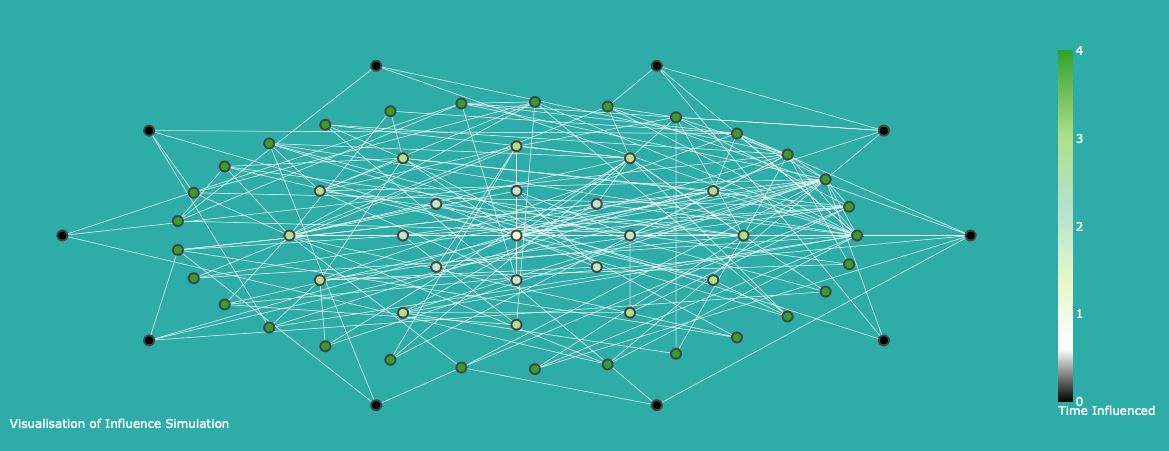

In [296]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont_size=16,
                showlegend=False,
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Visualisation of Influence Simulation",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002,
                    font=dict(color="#FFFFFF"))],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                paper_bgcolor='#2EACA7',
                plot_bgcolor='#2EACA7')
                )
fig.show()

In [266]:
# node_adjacencies = []
# node_text = []
# for node, adjacencies in enumerate(G.adjacency()):
#     node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1])))

# node_trace.marker.color = node_adjacencies
# node_trace.text = node_text

In [122]:
# node_adjacencies = []
# node_text = []
# for node, adjacencies in enumerate(G.adjacency()):
#     node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1])))

# node_trace.marker.color = node_adjacencies
# node_trace.text = node_text

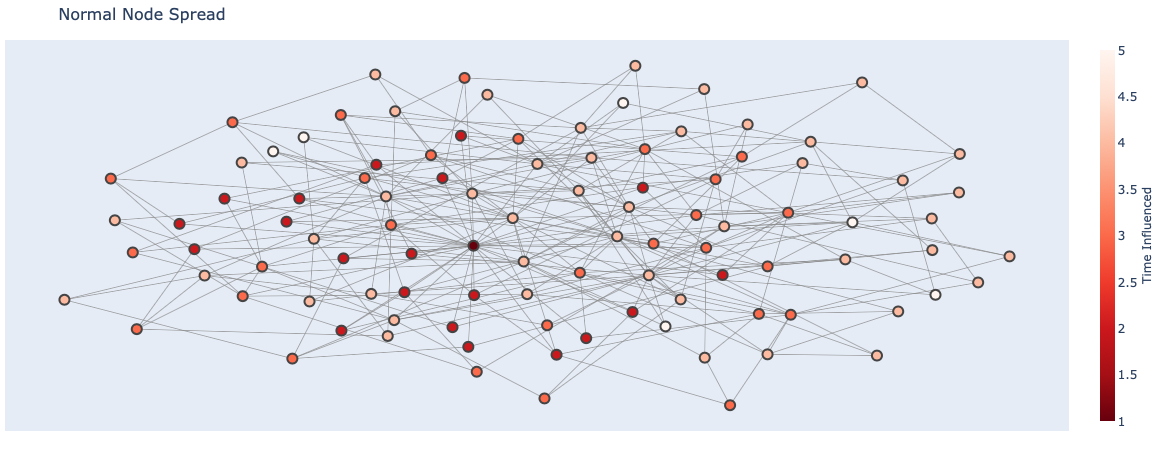